# **Task 1**

---

## **1. Web scraping and analysis**

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### **a. Scraping data from Skytrax**

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
!pip install nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Most uncomfortable flight I...
1,✅ Trip Verified | I booked our first out of c...
2,✅ Trip Verified | My husband and I booked seat...
3,"Not Verified | May 3, flew from Seattle to He..."
4,✅ Trip Verified | I went through three flights...


In [5]:
df.to_csv("BA_reviews.csv")

Now we have our dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

The next thing that we should do is clean this data to remove any unnecessary text from each of the rows. For example, **"✅ Trip Verified"** can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## **Data Cleaning**

In [6]:
df["reviews"]

0      ✅ Trip Verified |  Most uncomfortable flight I...
1      ✅ Trip Verified |  I booked our first out of c...
2      ✅ Trip Verified | My husband and I booked seat...
3      Not Verified |  May 3, flew from Seattle to He...
4      ✅ Trip Verified | I went through three flights...
                             ...                        
995    ✅ Trip Verified | Flew London Gatwick to Tiran...
996    ✅ Trip Verified |  London Heathrow to Murcia a...
997    ✅ Trip Verified |  London to Amsterdam. BA's s...
998    ✅ Trip Verified |  Aberdeen to Abu Dhabi via L...
999    ✅ Trip Verified |  Prague to Denver via London...
Name: reviews, Length: 1000, dtype: object

In [7]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [8]:
df

,reviews
0,Most uncomfortable flight I have ever experi...
1,I booked our first out of country trip to ta...
2,My husband and I booked seats within our prem...
3,"May 3, flew from Seattle to Heathrow then to..."
4,I went through three flights to reach my dest...
...,...
995,Flew London Gatwick to Tirana Rinas. Bag drop...
996,London Heathrow to Murcia and back. A few pr...
997,London to Amsterdam. BA's service has gone n...
998,Aberdeen to Abu Dhabi via London. Despite be...


In [9]:
df.isnull().sum()

reviews    0
dtype: int64

### **Standardize text:**

Convert text to lowercase: This ensures that the text is consistent and case-insensitive for further processing.

In [10]:
df['reviews'] = df['reviews'].str.lower()

### **Remove unnecessary characters or symbols:**
Use regular expressions or string operations to remove any special characters, punctuation, or symbols that are not relevant for analysis.

In [11]:
df['reviews'] = df['reviews'].apply(lambda x: re.sub(r"[^a-zA-Z0-9]", " ", x))

### **Tokenization:**
Tokenize the text into individual words or tokens using NLTK's word_tokenize function.

In [12]:
df['tokenized_reviews'] = df['reviews'].apply(lambda x: word_tokenize(x))

### **Remove Stopwords:**
Remove common words that do not carry much meaning or value for analysis. You can use NLTK's stopwords corpus to remove stopwords.

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
stop_words = set(stopwords.words('english'))
df['tokenized_reviews'] = df['tokenized_reviews'].apply(lambda x: [word for word in x if word not in stop_words])

### **Lemmatization:**

Reduce words to their base or root form to consolidate similar words and improve analysis accuracy. You can use either lemmatization or stemming techniques.


*   Lemmatization using NLTK's WordNetLemmatizer:




In [15]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
lemmatizer = WordNetLemmatizer()
df['lemmatized_reviews'] = df['tokenized_reviews'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [17]:
df

,reviews,tokenized_reviews,lemmatized_reviews
0,most uncomfortable flight i have ever experi...,"[uncomfortable, flight, ever, experienced, lon...","[uncomfortable, flight, ever, experienced, lon..."
1,i booked our first out of country trip to ta...,"[booked, first, country, trip, take, husband, ...","[booked, first, country, trip, take, husband, ..."
2,my husband and i booked seats within our prem...,"[husband, booked, seats, within, premium, econ...","[husband, booked, seat, within, premium, econo..."
3,may 3 flew from seattle to heathrow then to...,"[may, 3, flew, seattle, heathrow, edinburgh, b...","[may, 3, flew, seattle, heathrow, edinburgh, b..."
4,i went through three flights to reach my dest...,"[went, three, flights, reach, destination, ba,...","[went, three, flight, reach, destination, ba, ..."
...,...,...,...
995,flew london gatwick to tirana rinas bag drop...,"[flew, london, gatwick, tirana, rinas, bag, dr...","[flew, london, gatwick, tirana, rinas, bag, dr..."
996,london heathrow to murcia and back a few pr...,"[london, heathrow, murcia, back, problems, hea...","[london, heathrow, murcia, back, problem, heat..."
997,london to amsterdam ba s service has gone n...,"[london, amsterdam, ba, service, gone, notably...","[london, amsterdam, ba, service, gone, notably..."
998,aberdeen to abu dhabi via london despite be...,"[aberdeen, abu, dhabi, via, london, despite, g...","[aberdeen, abu, dhabi, via, london, despite, g..."


### **Perform Sentiment Analysis:**

Follow the steps mentioned earlier to perform sentiment analysis using NLTK's SentimentIntensityAnalyzer.

In [18]:
sid = SentimentIntensityAnalyzer()
df['sentiment'] = df['reviews'].apply(lambda x: sid.polarity_scores(x)['compound'])

Now we'll sort them into positive, negative and neutral:

In [19]:
def analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['sentiment'].apply(analysis)
df.head()

,reviews,tokenized_reviews,lemmatized_reviews,sentiment,Analysis
0,most uncomfortable flight i have ever experi...,"[uncomfortable, flight, ever, experienced, lon...","[uncomfortable, flight, ever, experienced, lon...",-0.3230,Negative
1,i booked our first out of country trip to ta...,"[booked, first, country, trip, take, husband, ...","[booked, first, country, trip, take, husband, ...",-0.4393,Negative
2,my husband and i booked seats within our prem...,"[husband, booked, seats, within, premium, econ...","[husband, booked, seat, within, premium, econo...",-0.8476,Negative
3,may 3 flew from seattle to heathrow then to...,"[may, 3, flew, seattle, heathrow, edinburgh, b...","[may, 3, flew, seattle, heathrow, edinburgh, b...",-0.2500,Negative
4,i went through three flights to reach my dest...,"[went, three, flights, reach, destination, ba,...","[went, three, flight, reach, destination, ba, ...",-0.6669,Negative


### **Explore Statistical Summaries:**

Calculate summary statistics of the sentiment scores or any other relevant metrics using pandas.

In [20]:
mean_sentiment = df['sentiment'].mean()
median_sentiment = df['sentiment'].median()

In [21]:
mean_sentiment

0.09316379999999999

In [22]:
median_sentiment

0.22744999999999999

##**Explore Sentiment Analysis Results:**

### **Visualize the Data:**

Use libraries like matplotlib or seaborn to create visualizations such as histograms, bar charts, or word clouds

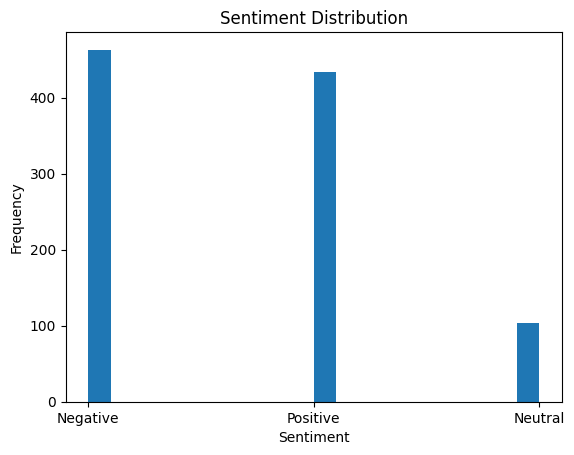

In [23]:
# Plot histogram of sentiment scores
plt.hist(df['Analysis'], bins=20)
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()

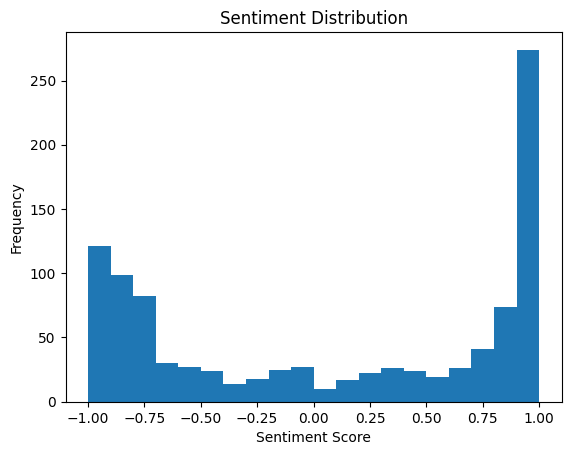

In [30]:
import matplotlib.pyplot as plt

# Plot histogram
plt.hist(df['sentiment'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution')
plt.show()


### **Pie chart:**
It's a circular diagram that resembles a pie. Each of the 'slices' represents a category of data that makes up the whole. Together, the pie represents 100 percent. The size of each 'slice' is relative to its portion of the whole.

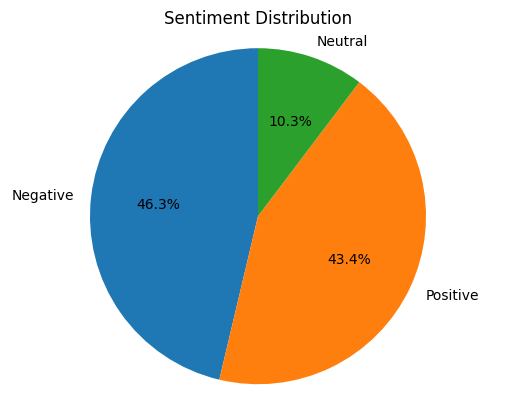

In [24]:
# Count the frequency of each sentiment category
sentiment_counts = df['Analysis'].value_counts()

# Create a pie chart
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90)

# Set aspect ratio to be equal so that the pie is drawn as a circle
plt.axis('equal')

# Add a title
plt.title('Sentiment Distribution')

# Display the chart
plt.show()

## **Wordcloud:**
We'll generate a word cloud to visualize the most frequent words in the reviews. This can give you a visual representation of the prominent sentiments or topics mentioned in the data.

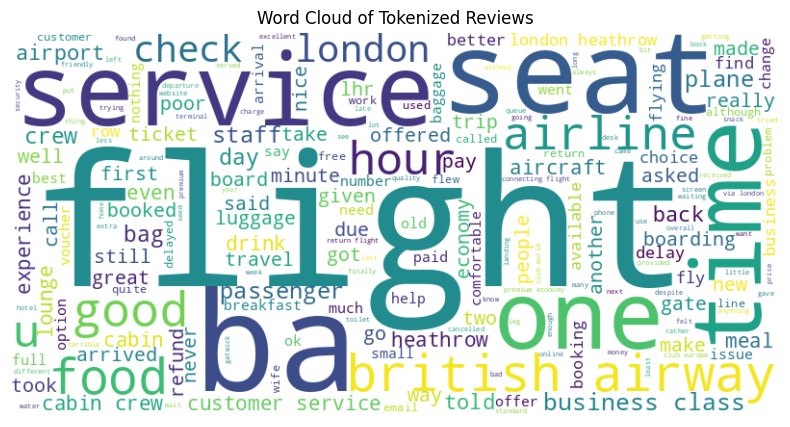

In [25]:
# Join the tokenized reviews into a single string
text = ' '.join(df['tokenized_reviews'].explode())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Tokenized Reviews')
plt.show()